# Analysis of Vehicular Accidents in the United States

## Introduction

Car crashes are one of the leading causes of accidents in the United States. According to the [Insurance Institute for Highway Safety](https://www.iihs.org/topics/fatality-statistics/detail/state-by-state), there were nearly 40,000 car crashes in the United States in 2021 alone, in which over 42,000 fatalities occured. Such rates are alarming as they call for a need to regulate highway and driving laws across the country through political and economic changes.

This project analyzes the factors that contribute to vehicular accidents in the United States by collecting and processing data across US states regarding vehicular incidents and performing data exploration and analysis in order to determine how strongly certain factors contribute to rising vehicle accidents. In addition, we will perform machine learning to classify and predict trends in vehicular accidents based on the weights of these factors.

This project walks through the following steps in the data science pipeline:

1. Data Curation
2. Data Preprocessing and Parsing
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Machine Learning
6. Insights and Discoveries

## Data Curation

Data curation involves collecting and integrating data from across various established sources. For comprehensive and reliable data regarding vehicular incidents across the United States, we will be using databases from the [National Highway Safety and Traffic Administration](https://www.nhtsa.gov/nhtsa-datasets-and-apis) to gather information about vehicle ratings and safety related issues that are directly related to issues with vehicle operations. 

As behavioral and other situational factors are also key indicators of crash likelihood, we will also be using the [Crash Viewer](https://crashviewer.nhtsa.dot.gov/CrashAPI) from the NHSTA to pull general information across a specified time period, which will be 2019-2020, about crash details, occupants, and other specific variables that are involved in crashes. As 2019-2020 has the most abundant amount of data among recent years, it will be used for the time period of vehicular accidents.

Data will be collected using API calls to NHSTA databases that use parameters to perform query operations. The results are then stored as csv files that can be accessed any time to be used for data processing.

The following imports will be made for data curation, processing, and machine learning development:

In [222]:
# For API calls
import requests
from io import StringIO
# For data storage and processing
import pandas as pd
import numpy as np
# For graphical operations
import matplotlib.pyplot as plt
import seaborn as sns
# For machine learning development and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

The first data set utilizes the Crash Data API to perform queries on crash cases given the year range, relevant states, and max range of vehicles present at the crash (which will be limited to 6), returning relevant statistics regarding the number of pedestrians involved, vehicles presemt, fatalities, and more. For this dataset, responses will be broken down into batches of states, as each response only takes up to 5,000 responses for a given
number of states within a certain time period. Therefore, 10 different datasets will store each batch of states. The states contained in each
dataset are labelled below.

In [2]:
# Alabama, Alaska, Arizona, Arkansas, California
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=1,2,4,5,6&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes1_df = pd.read_csv(StringIO(response.text))
# Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=8,9,10,11,12&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes2_df = pd.read_csv(StringIO(response.text))
#Georgia, Hawaii, Idaho, Illinois
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=13,15,16,17&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes3_df = pd.read_csv(StringIO(response.text))
#Indiana, Iowa, Kansas, Kentucky, Louisiana
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=18,19,20,21,22,23&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes4_df = pd.read_csv(StringIO(response.text))
#Maryland, Massachusetts, Michigan, Minnesota, Mississippi
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=24,25,26,27,28&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes5_df = pd.read_csv(StringIO(response.text))
#Missouri, Montana, Nebraska, Nevada, New Hampshire
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=29,30,31,32,33&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes6_df = pd.read_csv(StringIO(response.text))
#New Jersey, New Mexico, New York, North Carolina
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=34,35,36,37&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes7_df = pd.read_csv(StringIO(response.text))
# North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=38,39,40,41,42&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes8_df = pd.read_csv(StringIO(response.text))
#Puerto Rico, Rhode Island, South Carolina, South Dakota, Tennessee, Texas
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=43,44,45,46,47,48&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes9_df = pd.read_csv(StringIO(response.text))
#Utah, Vermont, Virginia, Virgin Islands, Washington, West Virginia, Wisconsin, Wyoming
response = requests.get("https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=49,50,51,52,53,54,55,56&fromYear=2019&toYear=2020&minNumOfVehicles=1&maxNumOfVehicles=6&format=csv")
crashes10_df = pd.read_csv(StringIO(response.text))

In [4]:
crashes_df = pd.concat([crashes1_df, crashes2_df, crashes3_df, crashes4_df, crashes5_df, crashes6_df, crashes7_df, crashes8_df, crashes9_df, crashes10_df],
                       ignore_index=True)
crashes_df.head()

,st_case,crashdate,state,statename,countyname,totalvehicles,fatals,persons,peds
0,10701,11/11/2020 3:37 PM,1,Alabama,MADISON (89),1,1,3,0
1,10702,10/10/2020 6:32 PM,1,Alabama,JEFFERSON (73),1,1,2,0
2,10703,11/3/2020 7:14 PM,1,Alabama,JEFFERSON (73),3,1,6,0
3,10704,10/18/2020 2:15 AM,1,Alabama,JEFFERSON (73),2,1,1,0
4,10705,10/29/2020 6:32 PM,1,Alabama,MADISON (89),1,1,1,1


## Data Preprocessing and Parsing

Data preprocessing involves performing operations to clean data in order to perform visualization and evaluation without disparities in the data including conflicting units, missing data, or other inconsistencies. For both datasets, data preprocessing will be made in order to perform data parsing, which is the process of extracting the physical data and performing evaluation.

To begin, the crashes datasets will be filtered to a new dataframe that includes columns containing information about the state id and aggregate number of fatalities per state.

In [8]:
combined_df = pd.DataFrame()

state_ids = []
statenames = []
sums = []

state_ids = (crashes_df["state"].unique())
statenames = (crashes_df["statename"].unique())
for state in state_ids:
    sums.append(crashes_df[crashes_df["state"] == state]["fatals"].sum())

sums = [x for x in sums if x != 0]
combined_df["state_id"] = state_ids
combined_df["statename"] = statenames
combined_df["fatalities"] = sums
combined_df = combined_df.sort_values(by="fatalities", ascending=False)
combined_df.head()

,state_id,statename,fatalities
9,12,Florida,3319
10,13,Georgia,3145
34,39,Ohio,2376
42,47,Tennessee,2350
21,26,Michigan,2070


Since we are primarily interested in areas where the most crashes occured, we will collect additional information about these filtered states using another API call that gathers report information regarding the specific case. We will create a new dataframe with report specific information about  the most prevalent cases in each of these high fatality states.

In [355]:
# Gather information for the top 5 states with highest fatalities in 2019
states = []
for ind, row in combined_df[:5].iterrows():
    states.append(row["state_id"])
    
accidents_df = pd.DataFrame()
for state in states:
    response = requests.get(f"https://crashviewer.nhtsa.dot.gov/CrashAPI/FARSData/GetFARSData?dataset=Accident&FromYear=2019&ToYear=2020&State={state}&format=csv")
    accidents_df = pd.concat([accidents_df, pd.read_csv(StringIO(response.text))])

Next, we will perform preprocessing to the accidents dataframe to remove rows containing missing values and filter columns based on most relevant criteria. Based on the descriptions of each column, the most relevant to consider are statename, ve_total, pvh_invl, peds, pernotmvit, persons, cityname, type_int, wrk_zone, road_fnc, nhs, rur_urb, hour, hourname, sp_jur, sp_jurname, harm_ev, harm_evname, man_coll, man_collname, weather1, weather2, sch_bus, rail, cf1, cf2, cf3, fatals, and drunk_dr, which are all specific elements that are related to the number of people, time and setting, and additional factors associated with each crash.

We will additionally perform filtering to remove any columns containing missing data. This includes columns containing NaN.

In [356]:
print(accidents_df.columns)
accidents_df = accidents_df[["statename", "state", "st_case", "ve_total", "pvh_invl", "peds", "pernotmvit", "persons", "typ_int", "wrk_zone", "road_fnc",
"nhs", "rur_urb", "hour", "hourname", "sp_jur", "harm_ev", "harm_evname", "man_coll", "man_collname", "weather1", "weather2", "sch_bus",
"rail", "cf1", "cf2", "cf3", "fatals", "drunk_dr"]]
accidents_df.dropna(axis=1, inplace=True)
accidents_df.head()

Index(['caseyear', 'state', 'st_case', 'statename', 've_total', 've_forms',
       'pvh_invl', 'peds', 'pernotmvit', 'permvit', 'persons', 'county',
       'countyname', 'city', 'cityname', 'day', 'month', 'monthname', 'year',
       'day_week', 'day_weekname', 'hour', 'hourname', 'minute', 'minutename',
       'nhs', 'nhsname', 'rur_urb', 'rur_urbname', 'func_sys', 'func_sysname',
       'rd_owner', 'rd_ownername', 'route', 'routename', 'tway_id', 'tway_id2',
       'milept', 'mileptname', 'latitude', 'latitudename', 'longitud',
       'longitudname', 'sp_jur', 'sp_jurname', 'harm_ev', 'harm_evname',
       'man_coll', 'man_collname', 'reljct1', 'reljct1name', 'reljct2',
       'reljct2name', 'typ_int', 'typ_intname', 'wrk_zone', 'wrk_zonename',
       'road_fnc', 'road_fncname', 'rel_road', 'rel_roadname', 'lgt_cond',
       'lgt_condname', 'weather1', 'weather1name', 'weather2', 'weather2name',
       'weather', 'weathername', 'sch_bus', 'sch_busname', 'rail', 'railname',
       'no

,statename,state,st_case,ve_total,pvh_invl,peds,pernotmvit,persons,typ_int,wrk_zone,...,hourname,sp_jur,harm_ev,harm_evname,man_coll,man_collname,sch_bus,rail,fatals,drunk_dr
0,Florida,12,120001,2,0,0,0,3,1,0,...,10:00am-10:59am,0,1,Rollover/Overturn,0,The First Harmful Event was Not a Collision wi...,0,0000000,1,1
1,Florida,12,120002,1,0,0,0,1,1,0,...,11:00pm-11:59pm,0,3,Immersion or Partial Immersion,0,The First Harmful Event was Not a Collision wi...,0,0000000,1,1
2,Florida,12,120003,2,0,0,0,2,1,0,...,11:00pm-11:59pm,0,12,Motor Vehicle In-Transport,6,Angle,0,0000000,1,0
3,Florida,12,120004,1,0,1,1,2,1,0,...,6:00pm-6:59pm,0,8,Pedestrian,0,The First Harmful Event was Not a Collision wi...,0,0000000,1,0
4,Florida,12,120005,4,0,0,0,4,1,0,...,3:00pm-3:59pm,0,12,Motor Vehicle In-Transport,1,Front-to-Rear,0,0000000,1,0


Next, we will create a dataframe from the accidents dataframe that collects the top 500 cases with fatalities. This will be used to interact with the Vehicles API, which collects information regarding the ratings of vehicles. By gathering the state names and cases associated with the highest 500 events, we will be able to gather the information about the vehicles present in the crash using the GetCaseDetails API call, which can then be used in the SafetyRatings call to output a list of the safety ratings corresponding to each car involved in the crash.

In [174]:
top_500fatals = accidents_df.sort_values(by="fatals", ascending=False)[:500]
top_500fatals.head()

,statename,state,st_case,ve_total,pvh_invl,peds,pernotmvit,persons,typ_int,wrk_zone,...,hourname,sp_jur,harm_ev,harm_evname,man_coll,man_collname,sch_bus,rail,fatals,drunk_dr
702,Georgia,13,130710,5,0,0,0,24,1,0,...,1:00pm-1:59pm,0,57,Cable Barrier,0,The First Harmful Event was Not a Collision wi...,0,0000000,7,0
102,Florida,12,120108,5,0,0,0,16,1,0,...,3:00pm-3:59pm,0,12,Motor Vehicle In-Transport,7,Sideswipe - Same Direction,0,0000000,7,0
5613,Florida,12,122861,2,0,0,0,6,1,0,...,6:00am-6:59am,0,12,Motor Vehicle In-Transport,6,Angle,0,0000000,6,0
1592,Georgia,13,130222,2,0,0,0,6,1,0,...,2:00am-2:59am,0,12,Motor Vehicle In-Transport,2,Front-to-Front,0,0000000,6,0
1741,Georgia,13,130374,3,0,0,0,12,1,0,...,10:00pm-10:59pm,0,12,Motor Vehicle In-Transport,2,Front-to-Front,0,0000000,5,0


Due to the number of operations and API calls that are made in the following blocks of code, the code has been commented out and the results are stored in a csv file that is accessible in the "data" folder of the repository. The code works by creating a dictionary that stores case ids as keys and vehicle ids associated with the case as values for each case number, which are retrieved from the GetCaseDetails API, and missing values are 
accounted for by skipping over cases where no vehicle information is provided

In [175]:
'''
cases = {}
session = requests.Session()
for ind, row in top_500fatals.iterrows():
    state = row["state"]
    casename = row["st_case"]
    response = session.get(f"https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseDetails?stateCase={casename}&caseYear=2019&state={state}&format=json")
    if response.json()["Results"]:
        for result in response.json()["Results"]:
            ids = []
            for result2 in result:            
                for case in result2["CrashResultSet"]["Vehicles"]:
                    res = session.get(f"https://api.nhtsa.gov/SafetyRatings/modelyear/{case['MOD_YEAR']}/make/{case['MAKENAME']}/model/{case['MODELNAME']}")
                    if res and res.json()["Results"]:
                        for res in res.json()["Results"]:
                            ids.append(res["VehicleId"])
                            cases[casename] = ids
'''

Once the dictionary is created, a pandas dataframe is made that stores the ratings of the vehicle in terms of various different metrics in each row and the case number associated with each vehicle is stored in an array that will be appended to the dataframe as a column. This will provide easy access to specific cases and can contribute to an understanding of how safety ratings can play a role in car accidents.

In [178]:
'''
df = pd.DataFrame()
casenames = []
session = requests.Session()
for key, val in cases.items():
    for id in val:
        response = session.get(f"https://api.nhtsa.gov/SafetyRatings/VehicleId/{id}")
        df = pd.concat([df, pd.DataFrame.from_dict(response.json()["Results"])], ignore_index=True)
        casenames.append(key)
session.close()
'''

130710
130710
130710
120108
120108
122861
122861
130374
130374
390924
122003
122003
122003
122790
121524
121524
121524
121524
260775
470112
470112
122513
122513
120435
120435
120435
390324
390324
260349
120555
120555
120555
120555
120943
120943
120943
130033
130033
391008
260485
130585
122031
121646
121646
121646
130146
130146
122414
122414
122414
260443
260443
130457
130457
260393
260393
390579
390579
390579
390579
390085
122967
260112
123033
390177
390177
123058
123058
123058
121956
121956
130256
130256
470835
470835
260421
260421
260421
260421
260420
130990
130990
121042
121042
120561
131012
131012
390843
120469
120469
130603
120459
390122
390122
390122
390122
390122
390441
121555
121555
260581
260581
260614
390035
390035
390035
260718
260718
260718
471051
471051
471051
122127
260882
391051
391051
391051
470968
470968
122691
122691
122614
122614
122614
122614
390772
390772
390772
390717
390950
390950
390950
390950
121344
121308
390980
470742
470742
130747
120369
120369
470901
470901

In [201]:
# df["Case Name"] = casenames
# df.to_csv("data/ratings.csv")

The last step in the data cleaning process is to remove final missing values from the newly created dataframe that stores the ratings of each vehicle involved in the top 500 crashes. Additionally, columns that do not provide values or relevant information are also removed.

In [324]:
ratings = pd.read_csv("data/ratings.csv")
ratings = ratings.dropna(axis=0)
ratings = ratings.drop(["Unnamed: 0", "VehiclePicture", "FrontCrashPicture", "FrontCrashVideo", "SideCrashPicture", "SideCrashVideo", "SidePolePicture",
                         "SidePoleVideo"], axis=1)
ratings = ratings.drop(ratings[ratings["OverallRating"] == "Not Rated"].index, axis=0)
ratings = ratings.reset_index(drop=True)
ratings.insert(0, ratings.columns[-1], ratings.pop(ratings.columns[-1]))
ratings.head()

,Case Name,OverallRating,OverallFrontCrashRating,FrontCrashDriversideRating,FrontCrashPassengersideRating,OverallSideCrashRating,SideCrashDriversideRating,SideCrashPassengersideRating,combinedSideBarrierAndPoleRating-Front,combinedSideBarrierAndPoleRating-Rear,...,NHTSAForwardCollisionWarning,NHTSALaneDepartureWarning,ComplaintsCount,RecallsCount,InvestigationCount,ModelYear,Make,Model,VehicleDescription,VehicleId
0,130710,5,5,5,4,5,4,5,5,5,...,No,Optional,51,2,0,2017,MAZDA,MAZDA3,2017 Mazda Mazda3 4 DR FWD,11782
1,120108,5,5,5,5,5,5,5,5,5,...,Optional,Optional,200,5,0,2016,ACURA,MDX,2016 Acura MDX SUV FWD,10027
2,120108,5,5,5,5,5,5,5,5,5,...,Optional,Optional,200,5,0,2016,ACURA,MDX,2016 Acura MDX SUV AWD,10026
3,122861,5,4,5,4,5,5,5,5,5,...,Optional,Optional,22,0,0,2019,CADILLAC,XT5,2019 Cadillac XT5 SUV AWD,13119
4,122861,4,4,5,4,5,5,5,5,5,...,Optional,Optional,22,0,0,2019,CADILLAC,XT5,2019 Cadillac XT5 SUV FWD,13118


Finally, we can use the accidents_df and ratings dataframes to perform data visualization and exploration and create hypotheses regarding crashes and factors corresponding to them among the most prevalent cases in the United States

## Exploratory Data Analysis

Exploratory data analysis involves visualizating data and determining different trends and correlations through graphic tools that enable the user to understand how the data operates. For this project, data exploration features discovering different trends in the car accidents data and plotting the different factors against the number of accidents/fatalities in order to form a conjecture and relevant hypothesis test, which can guide the remaining sections of the data science pipeline where machine learning aims to test the hypothesis.

To begin, we will plot the number of fatalities across all 50 states for car crashes in the year 2019 in order to visualize the spread of accidents across regions.

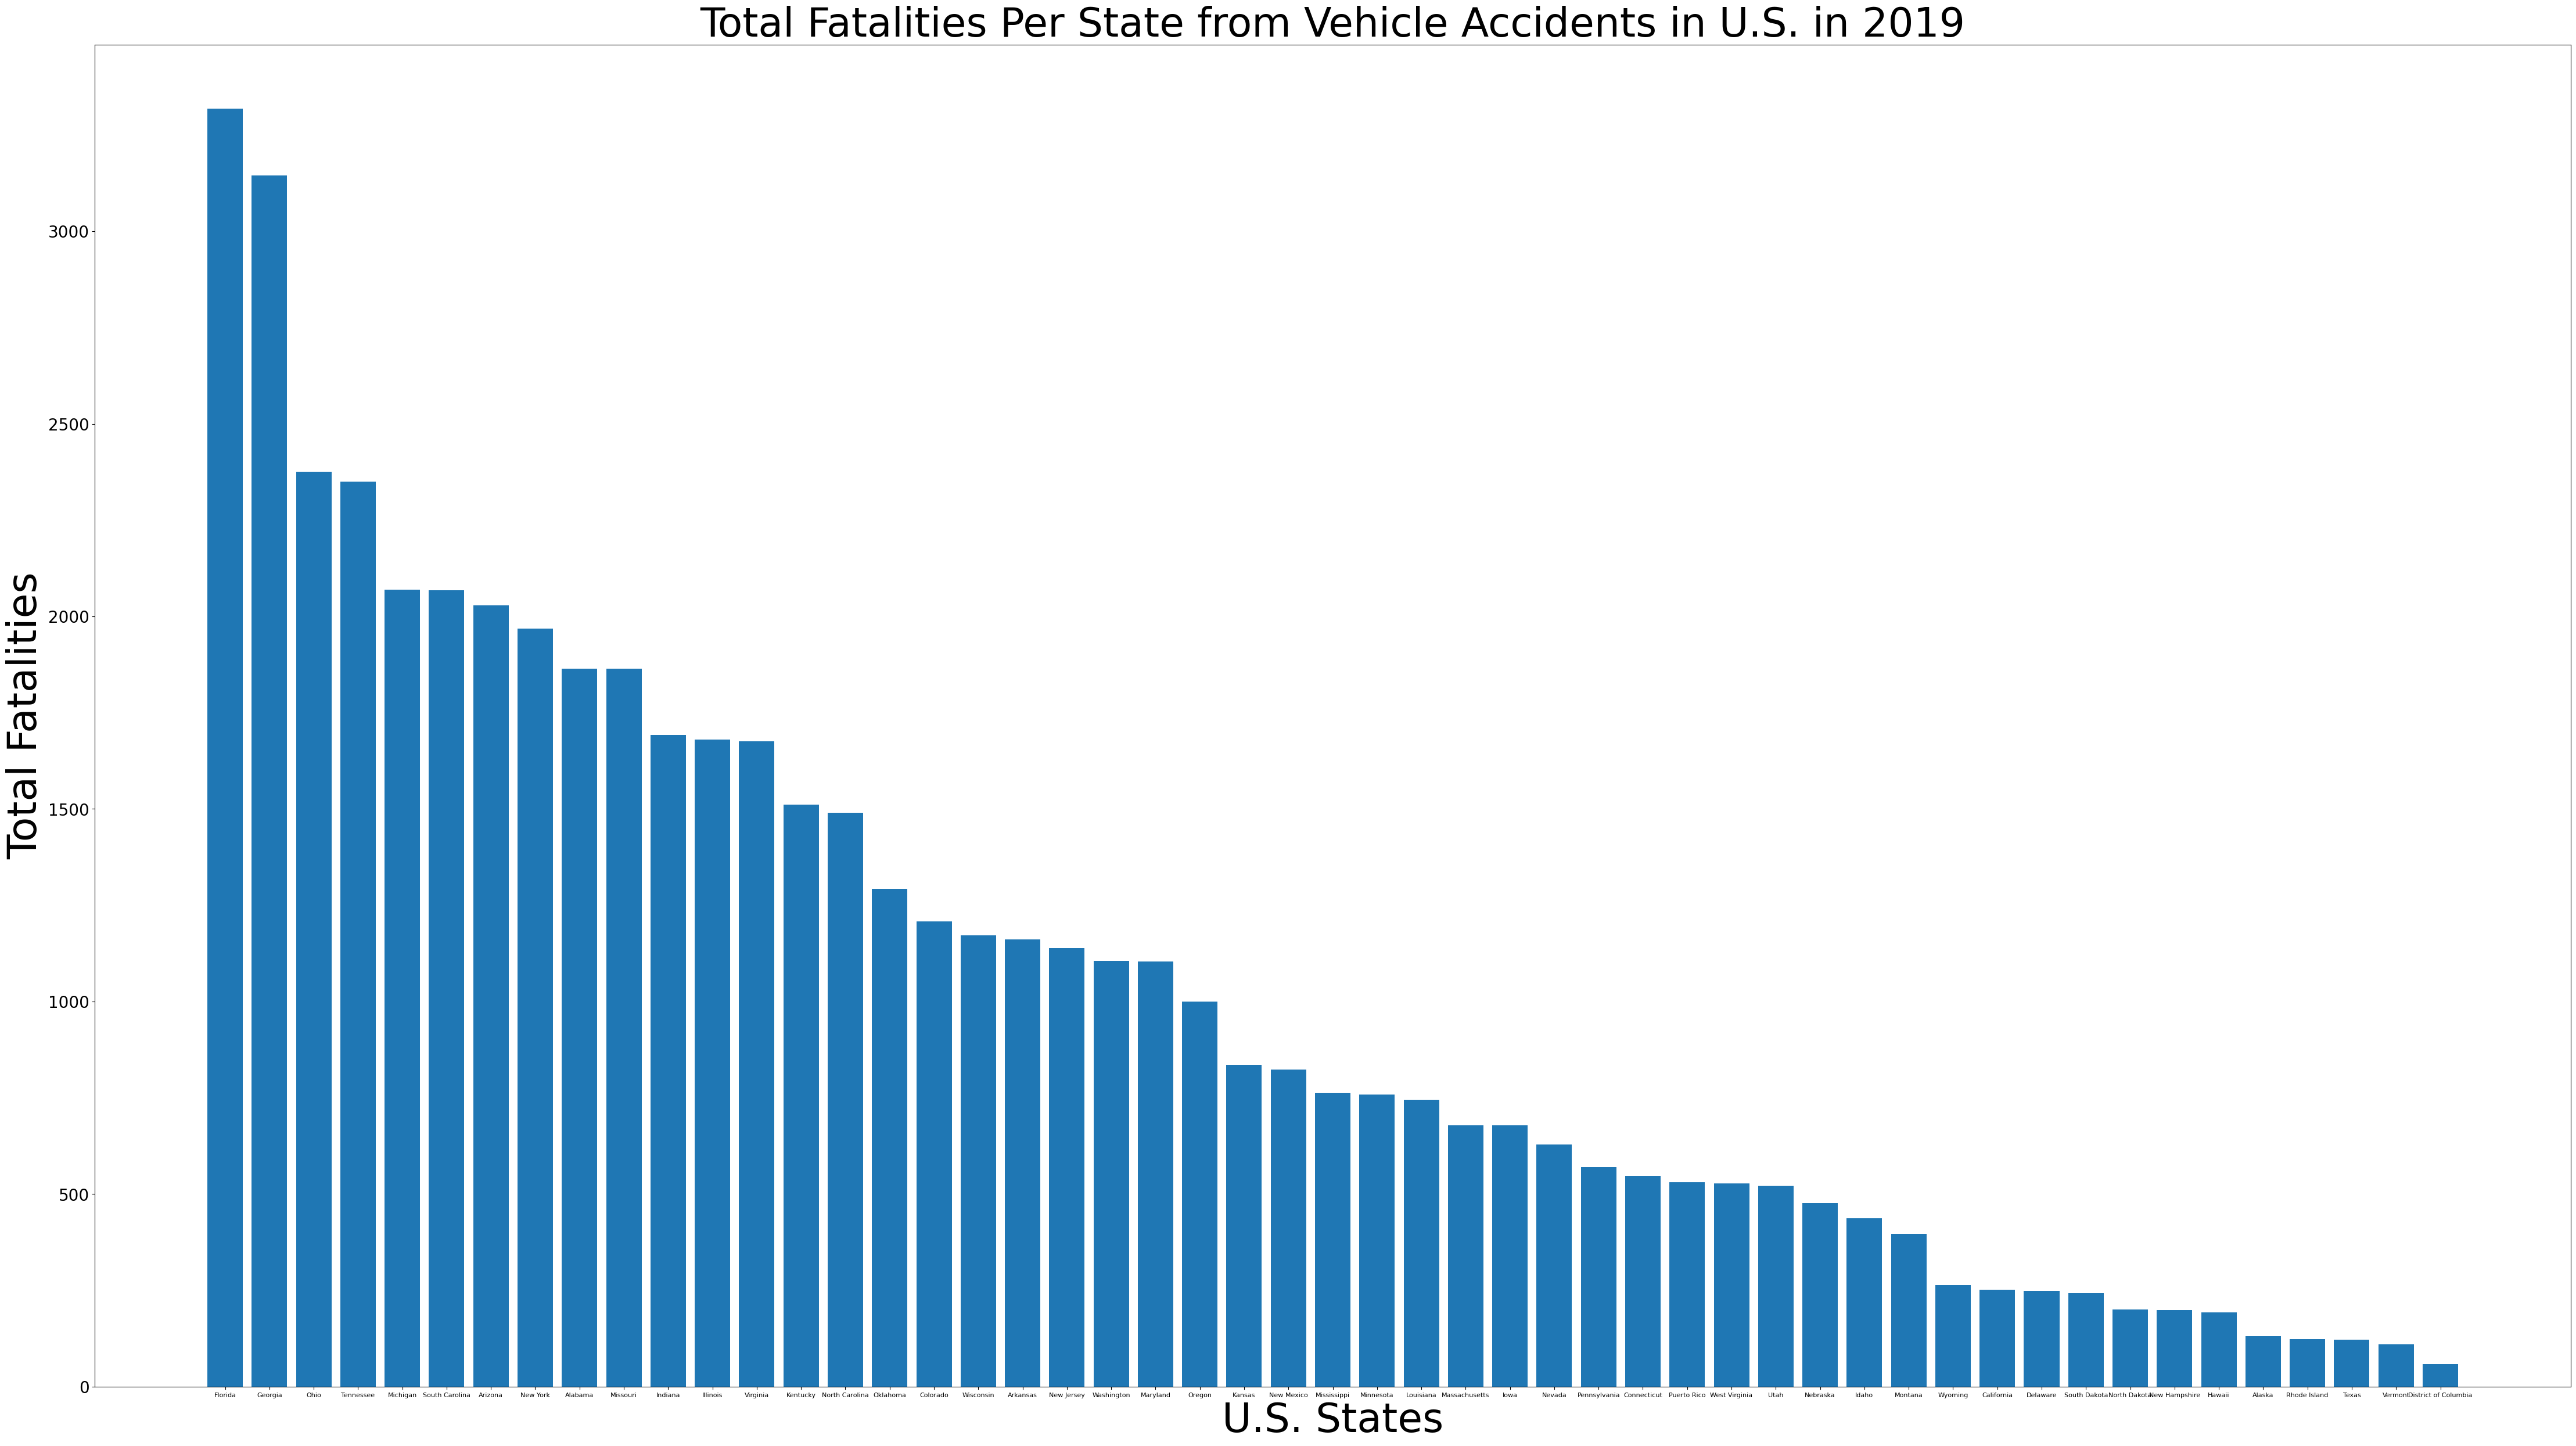

In [293]:
plt.figure(figsize=(55,30))
plt.bar(combined_df["statename"], combined_df["fatalities"], width=0.8)
plt.xticks(fontsize=8)
plt.xlabel("U.S. States", fontsize=50)
plt.yticks(fontsize=20)
plt.ylabel("Total Fatalities", fontsize=50)
plt.title("Total Fatalities Per State from Vehicle Accidents in U.S. in 2019", fontsize=50)
plt.show()

To better represent the distribution of fatalities across states, we can group the states by regions (West, Midwest, East) and evaluate how regions have impacts on accident rates.

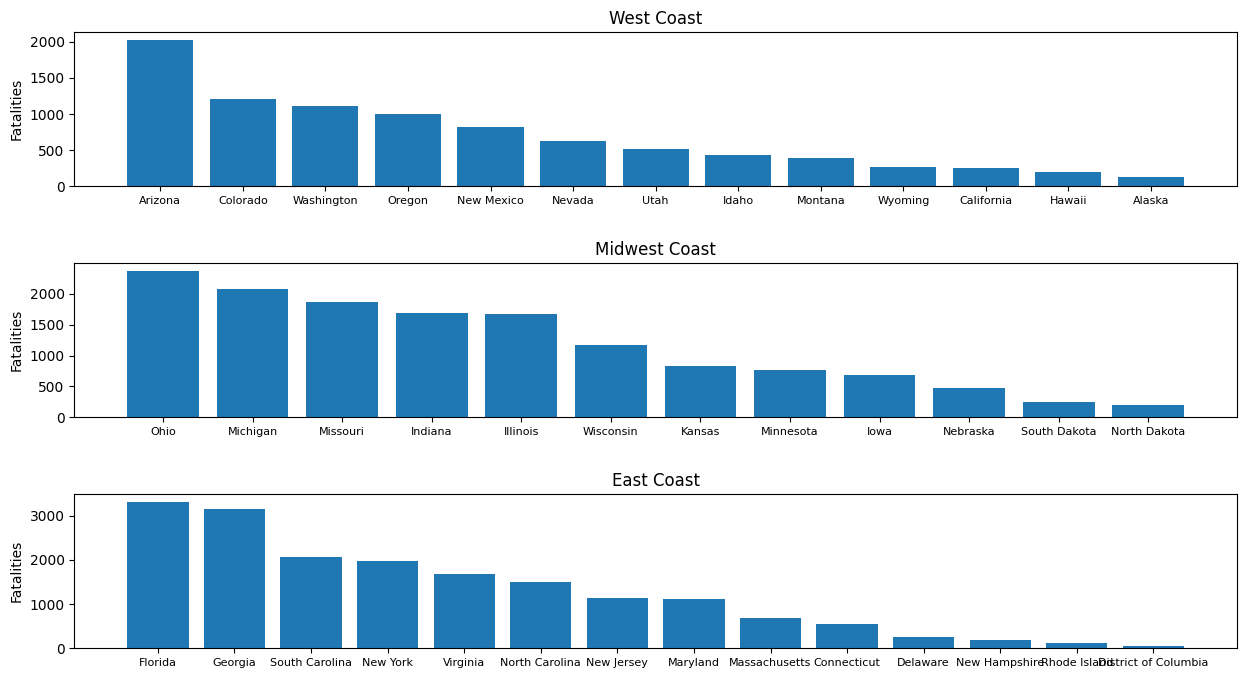

In [294]:
west = ["Arizona", "Colorado", "Utah", "Nevada", "New Mexico", "Idaho", "Montana", "Wyoming", "California", "Washington", "Oregon", "Hawaii", "Alaska"]
midwest = ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
east = ["Connecticut", "Delaware", "Florida", "Georgia", "Maine", "Maryland", "Massachusetts", "New Hampshire", "New Jersey", "New York", "North Carolina", "Rhode Island", "South Carolina", "Virginia", "District of Columbia"]
west = combined_df[combined_df["statename"].isin(west)]
midwest = combined_df[combined_df["statename"].isin(midwest)]
east = combined_df[combined_df["statename"].isin(east)]

fig, axs = plt.subplots(3, figsize=(15,8))
axs[0].bar(west["statename"], west["fatalities"], width=0.8)
axs[0].tick_params("x", labelsize=8)
axs[0].set_ylabel("Fatalities")
axs[0].set_title("West Coast")
axs[1].bar(midwest["statename"], midwest["fatalities"], width=0.8)
axs[1].tick_params("x", labelsize=8)
axs[1].set_ylabel("Fatalities")
axs[1].set_title("Midwest Coast")
axs[2].bar(east["statename"], east["fatalities"], width=0.8)
axs[2].tick_params("x", labelsize=8)
axs[2].set_ylabel("Fatalities")
axs[2].set_title("East Coast")
plt.subplots_adjust(hspace=0.5)
plt.show()

Based on the distributions of each region, it appears that the West, Midwest, and East coasts appear to have similar distributions in accidents. We can create a violin plot to confirm our observations.

Text(0.5, 1.0, 'Violin Plot of Fatalities by Region')

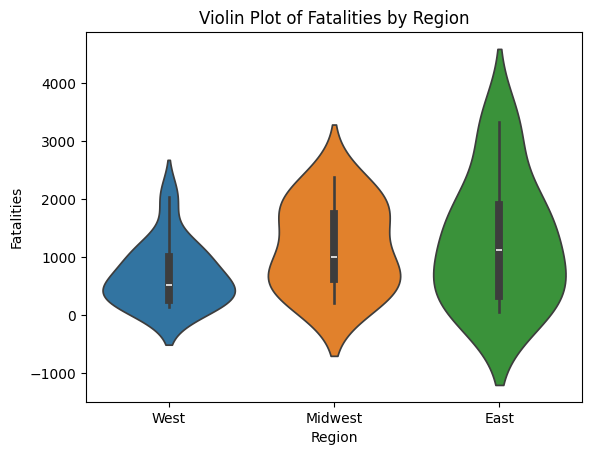

In [303]:
data = {"West": west["fatalities"].values, "Midwest": midwest["fatalities"].values, "East": east["fatalities"].values}
sns.violinplot(data=data)
plt.xlabel("Region")
plt.ylabel("Fatalities")
plt.title("Violin Plot of Fatalities by Region")

Overall, each region has a similar distribution, but the east coast appears to have some outliers which result in a greater spread of values in general. This could be explained by many factors, especially considering Florida and Georgia, which are states with a larger amount of accidents overall. Such factors may indicate that certain regions in the east coast are at greater risk of accidents.

Next, we will analyze crash ratings using the ratings dataframe and examine how fatalities are impacted by the quality of cars based on the cases provided.

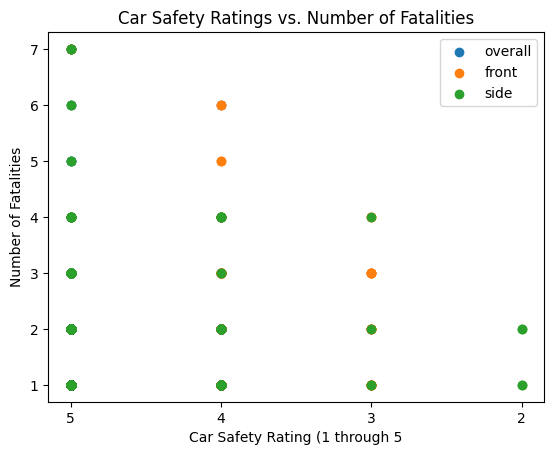

In [340]:
# Include information about fatalities where case numbers overlap with the accident_df
#ratings_modified = pd.merge(ratings, accidents_df[["st_case", "fatals"]], how="left", right_on = "st_case", left_on = "Case Name")
plt.scatter(ratings_modified["OverallRating"], ratings_modified["fatals"], label="overall")
plt.scatter(ratings_modified["OverallFrontCrashRating"], ratings_modified["fatals"], label="front")
plt.scatter(ratings_modified["OverallSideCrashRating"], ratings_modified["fatals"], label="side")
plt.legend()
plt.xlabel("Car Safety Rating (1 through 5")
plt.ylabel("Number of Fatalities")
plt.title("Car Safety Ratings vs. Number of Fatalities")
plt.show()

Overall, there does not seem to be a strong correlation between car safety and the severity of accidents, despite appearing as if there is without observing the data. This may be due to the presence of high ratings throughout all car users in 2019, which suggests that car safety is not primarily an issue and there are other factors that are beyond the control of manufacturers that may impact car accidents. 

Finally, we can analyze each individual factor in the accidents_df and determine which factors appear to have the strongest correlation with accidents.

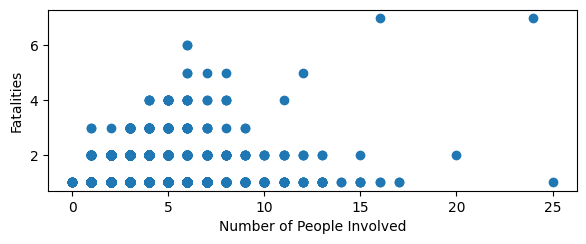

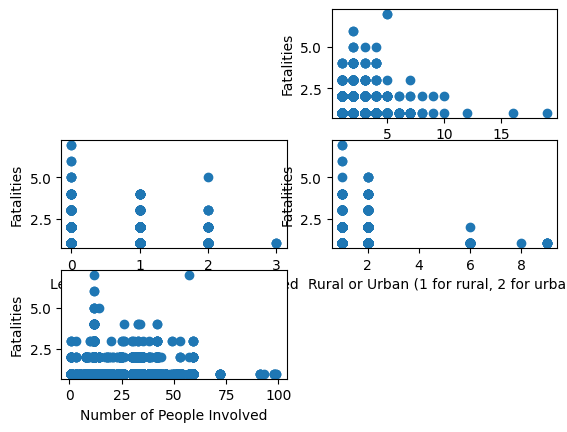

In [371]:
plt.figure(figsize=(15,8))

plt.subplot(3,2,1)
plt.scatter(accidents_df["persons"], accidents_df["fatals"])
plt.xlabel("Number of People Involved")
plt.ylabel("Fatalities")
plt.show()

plt.subplot(3, 2, 2)
plt.scatter(accidents_df["ve_total"], accidents_df["fatals"])
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Fatalities")
accidents_df.head()

plt.subplot(3, 2, 3)
plt.scatter(accidents_df["drunk_dr"], accidents_df["fatals"])
plt.xlabel("Level of Alcoholic Content Detected")
plt.ylabel("Fatalities")

plt.subplot(3, 2, 4)
plt.scatter(accidents_df["rur_urb"], accidents_df["fatals"])
plt.xlabel("Rural or Urban (1 for rural, 2 for urban)")
plt.ylabel("Fatalities")

plt.subplot(3, 2, 5)
plt.scatter(accidents_df["harm_ev"], accidents_df["fatals"])
plt.xlabel("Number of People Involved")
plt.ylabel("Fatalities")
plt.show()

# Hypothesis Testing

## Todo